# Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import os
import nltk
import tensorflow as tf
from keras.layers import *
from tensorflow import *
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import *
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.preprocessing import LabelEncoder
import warnings
import csv
import random
from gensim.models import Word2Vec
from collections import Counter
from utils.textnormalization import TextNormalization
from utils.machinelearning import machine_learning_model, fit_model, metrics_values, confusion_matrix_
from utils.deeplearning import convolutional_neural_network_1d, model_compile, model_fit, evaluate, plot_accuracy_loss, lstm_, gru_
from utils.sentimentinformation import sentiment_percentage, sentiment_counts
from utils.wordcloud import wordcloud
from utils.most_frequent_word_plot import go_figure , bar_plot
from utils.deeplearning_preprcosesing import  deeplearning_preprcosesing_
from utils.word_2_vec import word_2_vec_
import itertools
pd.options.display.max_rows = 100
pd.options.display.max_columns =None 
random.seed(40)
tf.random.set_seed(40)

# Download Some Packages

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# Ignore Warnings

In [ ]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings(action='ignore')

# Read Data

In [ ]:
Train = pd.read_csv('Yelp_Train.csv', header=None)
Train.rename(columns={1: 'Review', 0: 'Sentiment'}, inplace=True)
Train = Train.sample(frac=0.20, random_state=44, ignore_index=True)
Train.head()

In [ ]:
Test = pd.read_csv('Yelp_Test.csv', header=None)
Test.rename(columns={1: 'Review', 0: 'Sentiment'}, inplace=True)
Test.head()

In [ ]:
Data1 = pd.read_csv('train.csv', header = None) 
Data2 = pd.read_csv('test.csv', header = None) 
Data = pd.concat([Data1, Data2], axis=0, ignore_index=True)
Data = Data[[2]]
Data.rename(columns={2: 'Review'}, inplace=True)
Data.head()

# Sentiment Information

**1-Train Set**

In [ ]:
sentiment_percentage(Train, 'Sentiment', (6, 6))

In [ ]:
sentiment_counts(Train, 'Sentiment', (6, 6))

**2-Test Set**

In [ ]:
sentiment_percentage(Test, 'Sentiment', (6, 6))

In [ ]:
sentiment_counts(Test, 'Sentiment', (6, 6))

# Number Of Sentences

**1-Train**

In [ ]:
Train['NumberOfSentences'] = Train['Review'].apply(lambda n:len(sent_tokenize(n)))
Train.drop(Train[Train["NumberOfSentences"] == 0].index, inplace = True)


In [ ]:
Train['NumberOfSentences'].sum()

**2-Test**

In [ ]:
Test['NumberOfSentences'] = Test['Review'].apply(lambda n:len(sent_tokenize(n)))
Test.drop(Test[Test["NumberOfSentences"] == 0].index, inplace = True)

In [ ]:
Test['NumberOfSentences'].sum()

# Average Number Of Sentences

**1-Train Set**

In [ ]:
AverageNumberOfSentence_Train = int(np.round(Train["NumberOfSentences"].mean()))
AverageNumberOfSentence_Train

**2-Test Set**

In [ ]:
AverageNumberOfSentence_Test = int(np.round(Test["NumberOfSentences"].mean()))
AverageNumberOfSentence_Test

# Maximum Number Of Sentences

**1-Train Set**

In [ ]:
MaximumNumberOfSentence_Train = Train["NumberOfSentences"].max()
MaximumNumberOfSentence_Train

**2-Test Set**

In [ ]:
MaximumNumberOfSentence_Test = Test["NumberOfSentences"].max()
MaximumNumberOfSentence_Test

# Minimum Number Of Sentences

**1-Train Set**

In [ ]:
MinimumNumberOfSentence_Train = Train["NumberOfSentences"].min()
MinimumNumberOfSentence_Train

**2-Test Set**

In [ ]:
MinimumNumberOfSentence_Test = Test["NumberOfSentences"].min()
MinimumNumberOfSentence_Test

# Text Normalization

In [ ]:
text_normalization = TextNormalization(_string_lower = True, 
                        _remove_emojis = True, 
                        _remove_hashtags = True, 
                        _remove_emails = True,
                        _remove_url = True, 
                        _remove_mention = True, 
                        _remove_duplicate_char = True,
                        _remove_single_char = True, 
                        _remove_new_line_char = True, 
                        _remove_number = True, 
                        _remove_html_tags = True, 
                        _remove_special_character = True, 
                        _remove_longest_than = True, 
                        _remove_whitespace = True, 
                        _remove_unicode_characters = True,
                        _stemmer = False, 
                        _remove_non_english = True, 
                        _remove_stop_words = True, 
                        _lemmatizer = False)

**1-Train Set**

In [ ]:
Train['Normalized_Review'] = Train['Review'].apply(lambda x: text_normalization.normalization(x))
Train

**2-Test Set**

In [ ]:
Test['Normalized_Review'] = Test['Review'].apply(lambda x: text_normalization.normalization(x))
Test

# Number Of Unique Words

**1-Train Set**

In [ ]:
UniqueWords_Train = set()
for word in Train['Normalized_Review'].str.split():
    UniqueWords_Train.update(word)
len(UniqueWords_Train)

**2-Test Set**

In [ ]:
UniqueWords_Test = set()
for word in Test['Normalized_Review'].str.split():
    UniqueWords_Test.update(word)
len(UniqueWords_Test)

# WordCloud

**1-Train Set**

In [ ]:
wordcloud(data=Train, target='Negative', width=1500, hieght=800, text='Normalized_Review')

In [ ]:
wordcloud(data=Train, target='Positive', width=1500, hieght=800, text='Normalized_Review')

**2-Test Set**

In [ ]:
wordcloud(data=Test, target='Negative', width=1500, hieght=800, text='Normalized_Review')

In [ ]:
wordcloud(data=Test, target='Positive', width=1500, hieght=800, text='Normalized_Review')

# Most Frequent Words 

**1-Train Set**

In [ ]:
MostFrequentWord_Train = Counter((Train['Normalized_Review']).str.split().explode()).most_common(15)
MostFrequentWordDF_Train = pd.DataFrame(MostFrequentWord_Train, columns=('Word', 'Count'))
MostFrequentWordDF_Train

In [ ]:
go_figure(data=MostFrequentWordDF_Train)

In [ ]:
bar_plot(data=MostFrequentWordDF_Train)

**2-Test Set**

In [ ]:
MostFrequentWord_Test = Counter((Test['Normalized_Review']).str.split().explode()).most_common(15)
MostFrequentWordDF_Test = pd.DataFrame(MostFrequentWord_Test, columns=('Word', 'Count'))
MostFrequentWordDF_Test

In [ ]:
go_figure(data=MostFrequentWordDF_Test)

In [ ]:
bar_plot(data=MostFrequentWordDF_Test)

# Number Of Words 

**1-Train Set**

In [ ]:
Train["Number of Words"] = Train["Normalized_Review"].apply(lambda n:len(word_tokenize(n)))
Train["Number of Words"].sum()

In [ ]:
Train.drop(Train[Train["Number of Words"] == 0].index, inplace = True)

**2-Test Set**

In [ ]:
Test["Number of Words"] = Test["Normalized_Review"].apply(lambda n:len(word_tokenize(n)))
Test["Number of Words"].sum()

In [ ]:
Test.drop(Test[Test["Number of Words"] == 0].index, inplace = True)

# Number Of Charachters 

**1-Train Test**

In [ ]:
Train["Number of Charachters"] = Train["Normalized_Review"].str.len()
Train["Number of Charachters"].sum()

**2-Test Set**

In [ ]:
Test["Number of Charachters"] = Test["Normalized_Review"].str.len()
Test["Number of Charachters"].sum()

# Average Number Of Words 

**1-Train Set**

In [ ]:
AverageNaumberOfWords_Train = int(np.round((Train["Number of Words"].mean())))
AverageNaumberOfWords_Train

**2-Test Set**

In [ ]:
AverageNaumberOfWords_Test = int(np.round((Test["Number of Words"].mean())))
AverageNaumberOfWords_Test

# Average Number Of Charachters 

**1-Train Set**

In [ ]:
AverageNumberOfCharachters_Train = int(np.round(Train["Number of Charachters"].mean()))
AverageNumberOfCharachters_Train

**2-Test Set**

In [ ]:
AverageNumberOfCharachters_Test = int(np.round(Test["Number of Charachters"].mean()))
AverageNumberOfCharachters_Test

# Maximum Number Of Word

**1-Train Set**

In [ ]:
MaximumNaumberOfWords_Train = Train["Number of Words"].max()
MaximumNaumberOfWords_Train

**2-Test Set**

In [ ]:
MaximumNaumberOfWords_Test = Test["Number of Words"].max()
MaximumNaumberOfWords_Test

# Maximum Number Of Charachters 

**1-Train Set**

In [ ]:
MaximumNumberOfCharachters_Train = Train['Number of Charachters'].max() 
MaximumNumberOfCharachters_Train

**2-Test Set**

In [ ]:
MaximumNumberOfCharachters_Test = Test['Number of Charachters'].max() 
MaximumNumberOfCharachters_Test

# Minimum Number Of Words

**1-Train Set**

In [ ]:
MimimumNaumberOfWords_Train = Train["Number of Words"].min()
MimimumNaumberOfWords_Train

**2-Test Set**

In [ ]:
MimimumNaumberOfWords_Test = Test["Number of Words"].min()
MimimumNaumberOfWords_Test

# Minimum Number Of Charachters 

**1-Train Set**

In [ ]:
MinimumNumberOfCharachters_Train = Train['Number of Charachters'].min() 
MinimumNumberOfCharachters_Train

**2-Test Set**

In [ ]:
MinimumNumberOfCharachters_Test = Test['Number of Charachters'].min() 
MinimumNumberOfCharachters_Test

# Split The Dataset Into Training And Testing

In [ ]:
X_train, X_test, y_train, y_test = Train['Normalized_Review'], Test['Normalized_Review'], Train['Sentiment'], Test['Sentiment']

# Encoding Dependent Variables (Y) Into Integer

In [ ]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# CountVectorizer

In [ ]:
CountVectorizer_ = CountVectorizer()
X_train_CV_ = CountVectorizer_.fit_transform(X_train)
X_test_CV_ = CountVectorizer_.transform(X_test)

In [ ]:
Voc = CountVectorizer_.vocabulary_
Voc

# Machine Learning

**1-Naive Bayes**

In [ ]:
Algorithm = MultinomialNB(alpha= 1)
Naive_Bayes = machine_learning_model(algorithm=Algorithm)
fit_model(model=Naive_Bayes, X_train=X_train_CV_, y_train=y_train)
confusion_matrix_(model=Naive_Bayes, X_test=X_test_CV_, y_test=y_test, name='Naive Bayes')

In [ ]:
metrics_values(model= Naive_Bayes, X_test=X_test_CV_, y_test=y_test)

**2-Logistic Regression**

In [ ]:
Algorithm = LogisticRegression()
Logistic_Regression = machine_learning_model(algorithm=Algorithm)
fit_model(model=Logistic_Regression, X_train=X_train_CV_, y_train=y_train)
confusion_matrix_(Logistic_Regression, X_test=X_test_CV_, y_test=y_test, name='Logistic Regression')

In [ ]:
metrics_values(model= Logistic_Regression, X_test=X_test_CV_, y_test=y_test)

**3-Decision Tree**

In [ ]:
Algorithm = DecisionTreeClassifier(criterion='gini')
Decision_Tree = machine_learning_model(algorithm=Algorithm)
fit_model(model=Decision_Tree, X_train=X_train_CV_, y_train=y_train)
confusion_matrix_(model=Decision_Tree, X_test=X_test_CV_, y_test=y_test, name='Decision Tree')

In [ ]:
metrics_values(model= Decision_Tree, X_test=X_test_CV_, y_test=y_test)

**4-K Nearest Neighbors**

In [ ]:
Algorithm =KNeighborsClassifier(metric='manhattan', n_neighbors=5)
K_Nearest_Neighbors = machine_learning_model(algorithm=Algorithm)
fit_model(model=K_Nearest_Neighbors, X_train=X_train_CV_, y_train=y_train)
confusion_matrix_(model=K_Nearest_Neighbors, X_test=X_test_CV_, y_test=y_test, name='K Nearest Neighbors')

In [ ]:
metrics_values(model= K_Nearest_Neighbors, X_test=X_test_CV_, y_test=y_test)

**5-Random Forest**

In [ ]:
Algorithm = RandomForestClassifier(criterion = 'entropy', n_estimators=200)
Random_Forest = machine_learning_model(algorithm=Algorithm)
fit_model(model=Random_Forest, X_train=X_train_CV_, y_train=y_train)
confusion_matrix_(model=Random_Forest, X_test=X_test_CV_, y_test=y_test, name='Random Forest')

In [ ]:
metrics_values(model= Random_Forest, X_test=X_test_CV_, y_test=y_test)

**6-SGD Classifier**

In [ ]:
Algorithm = SGDClassifier(loss='hinge')
SGD = machine_learning_model(algorithm=Algorithm)
fit_model(model=SGD, X_train=X_train_CV_, y_train=y_train)
confusion_matrix_(model=SGD, X_test=X_test_CV_, y_test=y_test, name='SGD Classifier')

In [ ]:
metrics_values(model= SGD, X_test=X_test_CV_, y_test=y_test)

# Build Word2Vec

In [71]:
word_2_vec_(data = Data['Review'], vector_size=300, sg = 0, name = 'Word2Vec300D')

# Deep Learning

In [72]:
tokenizer, vocab_size, max_length, encoded_X_train , encoded_X_test = deeplearning_preprcosesing_(X_train=X_train, X_test=X_test,  truncating='pre', padding='pre')
embedding_dim = 300

In [73]:
Word_2_Vec_300D = './Word2Vec300D.txt'
embedding_dic = {}
with open(Word_2_Vec_300D) as f:
    for line in f:
        values = line.split()
        word = values[0]
        x = np.asarray(values[1:], dtype='float32')
        embedding_dic[word] = x

In [74]:
embedding_matrix = np.zeros((vocab_size+1, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embedding_dic.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [75]:
print('The Vocab Size Is :',vocab_size)
print('')
print('The Max Length Is :', max_length)

The Vocab Size Is : 94719

The Max Length Is : 678


In [76]:
Callback = tf.keras.callbacks.EarlyStopping(
                    monitor="accuracy",
                    mode="max",
                    patience=3
                )

**7-Convolutional Neural Network**

Epoch 1/10
3500/3500 [==============================] - 40s 11ms/step - loss: 0.3250 - accuracy: 0.8732 - val_loss: 0.2698 - val_accuracy: 0.8956
Epoch 2/10
3500/3500 [==============================] - 38s 11ms/step - loss: 0.2776 - accuracy: 0.8942 - val_loss: 0.2638 - val_accuracy: 0.8990
Epoch 3/10
3500/3500 [==============================] - 37s 11ms/step - loss: 0.2694 - accuracy: 0.8969 - val_loss: 0.2697 - val_accuracy: 0.8948
Epoch 4/10
3500/3500 [==============================] - 36s 10ms/step - loss: 0.2668 - accuracy: 0.8981 - val_loss: 0.2517 - val_accuracy: 0.9037
Epoch 5/10
3500/3500 [==============================] - 36s 10ms/step - loss: 0.2643 - accuracy: 0.8986 - val_loss: 0.2549 - val_accuracy: 0.9044
Epoch 6/10
3500/3500 [==============================] - 36s 10ms/step - loss: 0.2633 - accuracy: 0.8995 - val_loss: 0.2554 - val_accuracy: 0.9042
Epoch 7/10
3500/3500 [==============================] - 37s 11ms/step - loss: 0.2636 - accuracy: 0.8994 - val_loss: 0.2483 -

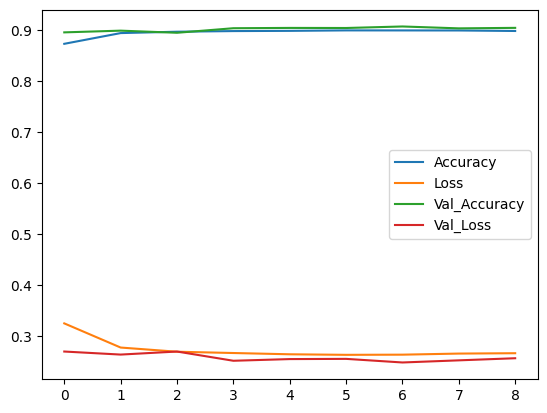

 
The Training Loss is 0.2455, And Training Accuracy is 0.9082
 
The Testing Loss is 0.2566, And Testing Accuracy is 0.9045


In [77]:
convolutional_neural_network = convolutional_neural_network_1d(vocab_size=vocab_size + 1, embedding_dim=embedding_dim, max_length=max_length, dropout=0.1, kernel=2, filters=32, strides=2, padding='valid', embeddings_matrix = embedding_matrix)
model_compile(model=convolutional_neural_network)
history = model_fit(model=convolutional_neural_network, X_train=encoded_X_train, y_train=y_train, epochs=10, X_test=encoded_X_test, y_test=y_test, batch_size=32, Callback=Callback)
plot_accuracy_loss(histoty=history)
evaluate(model=convolutional_neural_network, x=encoded_X_train, y=y_train, train_test='Training')
evaluate(model=convolutional_neural_network, x=encoded_X_test, y=y_test, train_test='Testing')

**8-LSTM**

Epoch 1/15
3500/3500 [==============================] - 185s 52ms/step - loss: 0.2654 - accuracy: 0.8894 - val_loss: 0.2415 - val_accuracy: 0.8974
Epoch 2/15
3500/3500 [==============================] - 181s 52ms/step - loss: 0.2280 - accuracy: 0.9066 - val_loss: 0.2654 - val_accuracy: 0.8882
Epoch 3/15
3500/3500 [==============================] - 181s 52ms/step - loss: 0.2230 - accuracy: 0.9083 - val_loss: 0.2208 - val_accuracy: 0.9098
Epoch 4/15
3500/3500 [==============================] - 193s 55ms/step - loss: 0.2073 - accuracy: 0.9145 - val_loss: 0.2198 - val_accuracy: 0.9101
Epoch 5/15
3500/3500 [==============================] - 194s 55ms/step - loss: 0.2019 - accuracy: 0.9163 - val_loss: 0.2166 - val_accuracy: 0.9137
Epoch 6/15
3500/3500 [==============================] - 194s 55ms/step - loss: 0.1964 - accuracy: 0.9191 - val_loss: 0.2216 - val_accuracy: 0.9102
Epoch 7/15
3500/3500 [==============================] - 194s 56ms/step - loss: 0.1969 - accuracy: 0.9187 - val_loss: 0

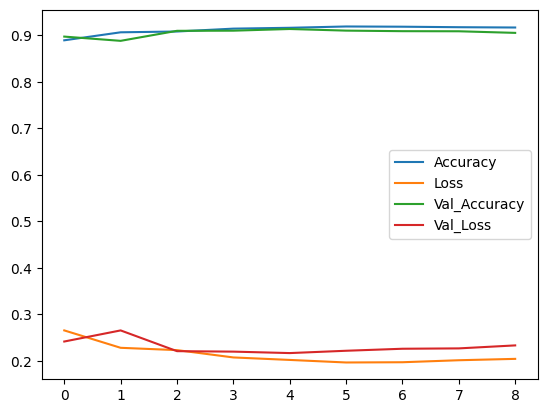

 
The Training Loss is 0.1977, And Training Accuracy is 0.9199
 
The Testing Loss is 0.2332, And Testing Accuracy is 0.9054


In [78]:
LSTM =lstm_(vocab_size= vocab_size + 1, embedding_dim= embedding_dim, max_length= max_length, dropout=0.1, units=64, embeddings_matrix = embedding_matrix)
model_compile(model=LSTM)
history = model_fit(model=LSTM, X_train=encoded_X_train, y_train=y_train, epochs=15, X_test=encoded_X_test, y_test=y_test, batch_size=32, Callback=Callback)
plot_accuracy_loss(histoty=history)
evaluate(model=LSTM, x=encoded_X_train, y=y_train, train_test='Training')
evaluate(model=LSTM, x=encoded_X_test,y= y_test, train_test='Testing')

**9-GRU**

Epoch 1/15
1750/1750 [==============================] - 139s 78ms/step - loss: 0.3050 - accuracy: 0.8678 - val_loss: 0.2183 - val_accuracy: 0.9119
Epoch 2/15
1750/1750 [==============================] - 136s 78ms/step - loss: 0.2159 - accuracy: 0.9134 - val_loss: 0.2113 - val_accuracy: 0.9152
Epoch 3/15
1750/1750 [==============================] - 137s 78ms/step - loss: 0.2199 - accuracy: 0.9107 - val_loss: 0.2161 - val_accuracy: 0.9123
Epoch 4/15
1750/1750 [==============================] - 133s 76ms/step - loss: 0.2113 - accuracy: 0.9139 - val_loss: 0.2231 - val_accuracy: 0.9092
Epoch 5/15
1750/1750 [==============================] - 129s 73ms/step - loss: 0.2355 - accuracy: 0.9021 - val_loss: 0.2287 - val_accuracy: 0.9073
Epoch 6/15
1750/1750 [==============================] - 129s 73ms/step - loss: 0.2212 - accuracy: 0.9099 - val_loss: 0.2127 - val_accuracy: 0.9130
Epoch 7/15
1750/1750 [==============================] - 129s 74ms/step - loss: 0.2044 - accuracy: 0.9170 - val_loss: 0

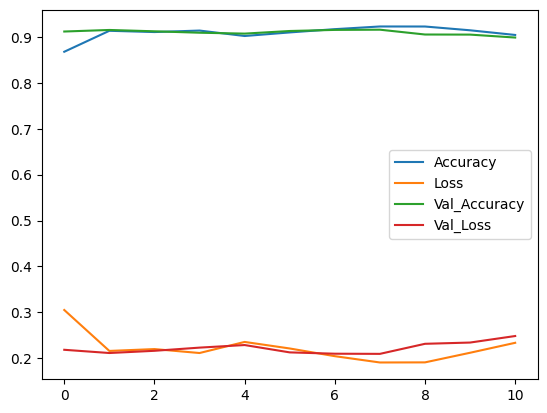

 
The Training Loss is 0.2279, And Training Accuracy is 0.9069
 
The Testing Loss is 0.2483, And Testing Accuracy is 0.8987


In [79]:
GRU_=gru_(vocab_size= vocab_size + 1, embedding_dim= embedding_dim, max_length= max_length, dropout=0.2, units=64, embeddings_matrix = embedding_matrix)
model_compile(model=GRU_)
history = model_fit(model=GRU_, X_train=encoded_X_train, y_train=y_train, epochs=15, X_test=encoded_X_test, y_test=y_test, batch_size=64, Callback=Callback)
plot_accuracy_loss(histoty=history)
evaluate(model=GRU_, x=encoded_X_train, y=y_train, train_test='Training')
evaluate(model=GRU_, x=encoded_X_test,y= y_test, train_test='Testing')  